# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline
#for neural network
import tensorflow as tf
import tensorflow 
import keras
from keras.preprocessing.image import load_img #load image to numpy array
from keras.models import sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
import tensorflow as tf
#import keras
print("Number of GPU enabaled",len(tf.config.experimental.list_physical_devices('GPU')))

Number of GPU enabaled 1


2022-08-28 08:11:15.342597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:11:15.506167: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:11:15.507051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-08-28 08:11:15.544658: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-28 08:11:15.545059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:11:15.545949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:11:15.546676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12617600110251361129
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16149905408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8824802363242355949
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [4]:
ls

__notebook__.ipynb


In [5]:
cd Dataset


[Errno 2] No such file or directory: 'Dataset'
/kaggle/working


In [6]:
BASE_DIR='../input/face-dataset/UTKFace'

In [7]:
#creating List of age gender
image_path=[]
age_labels=[]
gender_labels =[]

for filename in tqdm(os.listdir(BASE_DIR)):
    path = os.path.join(BASE_DIR, filename)
    temp= filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_path.append(path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [8]:
df = pd.DataFrame()
df['images']=image_path
df['age']=age_labels
df['gender']=gender_labels

In [9]:
df

,images,age,gender
0,../input/face-dataset/UTKFace/26_0_2_201701040...,26,0
1,../input/face-dataset/UTKFace/22_1_1_201701122...,22,1
2,../input/face-dataset/UTKFace/21_1_3_201701050...,21,1
3,../input/face-dataset/UTKFace/28_0_0_201701171...,28,0
4,../input/face-dataset/UTKFace/17_1_4_201701032...,17,1
...,...,...,...
23703,../input/face-dataset/UTKFace/41_0_0_201701090...,41,0
23704,../input/face-dataset/UTKFace/42_0_0_201701171...,42,0
23705,../input/face-dataset/UTKFace/2_0_2_2016121922...,2,0
23706,../input/face-dataset/UTKFace/65_1_0_201701101...,65,1


In [10]:
#creating dic to label Gender
gender_dic = {0:'Male',1:'Female'}


# Exploratory Data Analysis

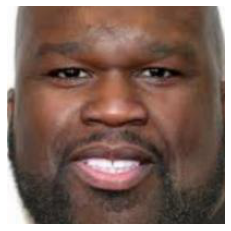

In [11]:
#displaying random images
from PIL import Image
img = Image.open(df['images'][2313])
plt.axis('off')#remove axis
plt.imshow(img);#semicolon remove additional text

<AxesSubplot:xlabel='age', ylabel='Density'>

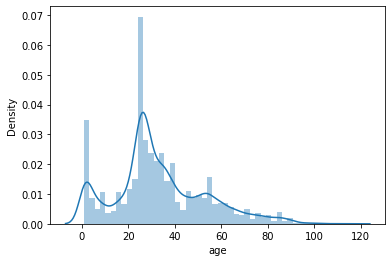

In [12]:
#class distribution of age
sns.distplot(df['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

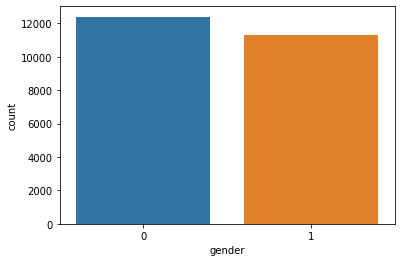

In [13]:
#distribution of gender
sns.countplot(df['gender'])

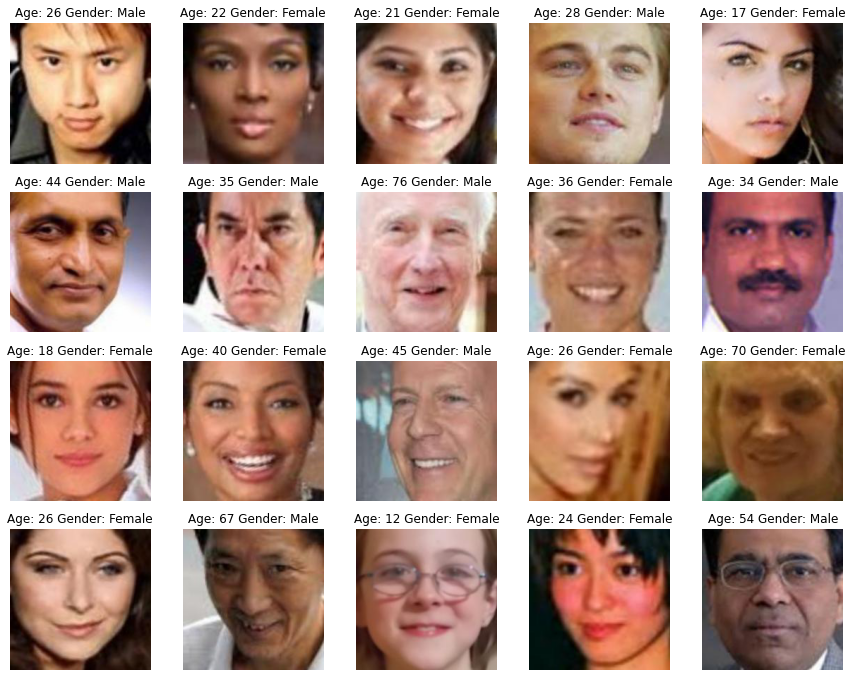

In [14]:
#displaying first 20 images
plt.figure(figsize=(15,15))
files = df.iloc[0:20]

for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dic[gender]}")#f=format
    plt.axis('off')#remove x/y axis

# Feature Extraction

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    #COnverting into greyscale due to limited RAM
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [16]:
x = extract_features(df["images"])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [17]:
x.shape  #("Length of fetures","Width","Height","RGB")

(23708, 128, 128, 1)

In [18]:
print(x)

[[[[ 11]
   [  6]
   [  7]
   ...
   [ 27]
   [ 43]
   [ 49]]

  [[ 13]
   [  4]
   [  4]
   ...
   [ 19]
   [ 34]
   [ 44]]

  [[ 19]
   [  4]
   [  2]
   ...
   [ 13]
   [ 28]
   [ 44]]

  ...

  [[ 46]
   [ 36]
   [ 23]
   ...
   [  4]
   [  4]
   [  5]]

  [[ 40]
   [ 30]
   [ 15]
   ...
   [  2]
   [  3]
   [  6]]

  [[ 48]
   [ 37]
   [ 20]
   ...
   [  0]
   [  4]
   [  9]]]


 [[[  3]
   [  3]
   [  3]
   ...
   [ 19]
   [ 28]
   [ 34]]

  [[  4]
   [  4]
   [  4]
   ...
   [ 25]
   [ 34]
   [ 41]]

  [[  4]
   [  4]
   [  4]
   ...
   [ 30]
   [ 40]
   [ 46]]

  ...

  [[ 88]
   [ 88]
   [ 88]
   ...
   [ 73]
   [ 73]
   [ 72]]

  [[ 97]
   [ 97]
   [ 97]
   ...
   [ 74]
   [ 73]
   [ 72]]

  [[107]
   [107]
   [106]
   ...
   [ 76]
   [ 75]
   [ 74]]]


 [[[ 41]
   [ 38]
   [ 35]
   ...
   [110]
   [143]
   [174]]

  [[ 38]
   [ 36]
   [ 35]
   ...
   [101]
   [135]
   [166]]

  [[ 36]
   [ 35]
   [ 34]
   ...
   [ 89]
   [124]
   [158]]

  ...

  [[  9]
   [ 12]
   [ 16]
   

In [19]:
#normalize the images to get output in range of (0-1)
X = x/255

In [20]:
print(X)

[[[[0.04313725]
   [0.02352941]
   [0.02745098]
   ...
   [0.10588235]
   [0.16862745]
   [0.19215686]]

  [[0.05098039]
   [0.01568627]
   [0.01568627]
   ...
   [0.0745098 ]
   [0.13333333]
   [0.17254902]]

  [[0.0745098 ]
   [0.01568627]
   [0.00784314]
   ...
   [0.05098039]
   [0.10980392]
   [0.17254902]]

  ...

  [[0.18039216]
   [0.14117647]
   [0.09019608]
   ...
   [0.01568627]
   [0.01568627]
   [0.01960784]]

  [[0.15686275]
   [0.11764706]
   [0.05882353]
   ...
   [0.00784314]
   [0.01176471]
   [0.02352941]]

  [[0.18823529]
   [0.14509804]
   [0.07843137]
   ...
   [0.        ]
   [0.01568627]
   [0.03529412]]]


 [[[0.01176471]
   [0.01176471]
   [0.01176471]
   ...
   [0.0745098 ]
   [0.10980392]
   [0.13333333]]

  [[0.01568627]
   [0.01568627]
   [0.01568627]
   ...
   [0.09803922]
   [0.13333333]
   [0.16078431]]

  [[0.01568627]
   [0.01568627]
   [0.01568627]
   ...
   [0.11764706]
   [0.15686275]
   [0.18039216]]

  ...

  [[0.34509804]
   [0.34509804]
   [0.3

In [21]:
#convert gender and age to numpy array
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [22]:
print(y_age,y_gender)

[26 22 21 ...  2 65 66] [0 1 1 ... 0 1 0]


In [23]:
input_shape = (128,128,1)

In [24]:
print(input_shape)

(128, 128, 1)


# Implementing CNN

    Input = image

    Output = Classification for Gender , Regression for age

In [25]:
inputs = Input((input_shape))
#convoultional Layes
#first layer
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
#second Layer
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
#third Layer
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
#Fourth layer
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
#flatten Everything :convert into single dimention vectors
flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)
#fully connected dense layers
dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

#output layers 1 Classification
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
#output layers 2 regression
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)
#compiling everything
model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# binary_crossentropy for gender
# mae(Mean absoulute error) for regression purpose
# metric is accuracy

2022-08-28 08:12:57.781629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:12:57.782936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:12:57.784047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:12:57.785230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 08:12:57.786469: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [26]:
model.summary() #show the summary of CNN model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 64)   18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

## Training Model

In [27]:
#80% Traing 20% validation
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)


2022-08-28 08:12:59.069652: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1242955776 exceeds 10% of free system memory.
2022-08-28 08:13:00.490337: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1242955776 exceeds 10% of free system memory.
2022-08-28 08:13:01.611116: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-08-28 08:13:03.538321: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


593/593 [==============================] - 17s 15ms/step - loss: 15.9716 - gender_out_loss: 0.6860 - age_out_loss: 15.2856 - gender_out_accuracy: 0.5361 - age_out_accuracy: 0.0477 - val_loss: 14.7001 - val_gender_out_loss: 0.5937 - val_age_out_loss: 14.1064 - val_gender_out_accuracy: 0.6858 - val_age_out_accuracy: 0.0462
Epoch 2/30
593/593 [==============================] - 8s 13ms/step - loss: 12.3134 - gender_out_loss: 0.5109 - age_out_loss: 11.8025 - gender_out_accuracy: 0.7498 - age_out_accuracy: 0.0458 - val_loss: 12.0409 - val_gender_out_loss: 0.4458 - val_age_out_loss: 11.5950 - val_gender_out_accuracy: 0.7843 - val_age_out_accuracy: 0.0462
Epoch 3/30
593/593 [==============================] - 8s 14ms/step - loss: 10.7031 - gender_out_loss: 0.4370 - age_out_loss: 10.2662 - gender_out_accuracy: 0.7932 - age_out_accuracy: 0.0441 - val_loss: 9.6102 - val_gender_out_loss: 0.4024 - val_age_out_loss: 9.2078 - val_gender_out_accuracy: 0.8151 - val_age_out_accuracy: 0.0460
Epoch 4/30
59

## Result

#### we are getting  Accuracy of 89% for gender and getting 6.583 of Mean Absoulute error for age

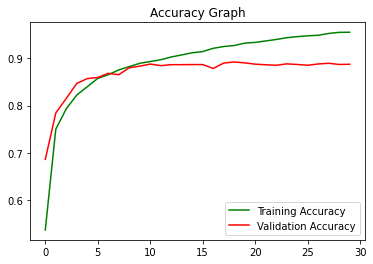

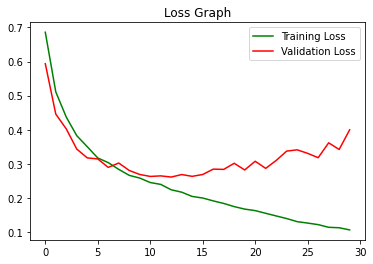

In [28]:
# plot results for Accuracy(Gender)
acc = history.history['gender_out_accuracy']#Traing accuracy
val_acc = history.history['val_gender_out_accuracy']#Validation Accuracy
epochs = range(len(acc))
# plot results for Traing/Validation Accuracy
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# plot results for Loss(Gender)
loss = history.history['gender_out_loss']#training Loss
val_loss = history.history['val_gender_out_loss']#validation Loss
# plot results for Traing/Validation Loss
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

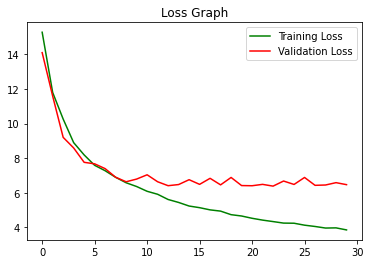

In [29]:
# plot results for age
loss = history.history['age_out_loss']#Training Loss
val_loss = history.history['val_age_out_loss']#validation Loss
epochs = range(len(loss))

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Testing Prediction

Original Gender: Male               Original Age: 82
Predicted Gender by Model: Male     Predicted Age by model: 77


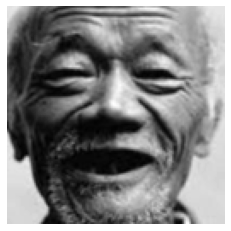

In [30]:
image_index = 425

print("Original Gender:", gender_dic[y_gender[image_index]], "              Original Age:", y_age[image_index])
# prediction
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dic[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender by Model:", pred_gender, "    Predicted Age by model:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');